In [1]:
import pandas as pd

data = pd.read_csv("../pm2_data.csv")

data.head()

,Unnamed: 0,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,0,Bishkek,PM2.5 - Principal,2019-02-06 06:00:00,2019,2,6,6,-999.0,-999,NaN,12.0,UG/M3,1 Hr,Valid
1,1,Bishkek,PM2.5 - Principal,2019-02-06 07:00:00,2019,2,6,7,17.0,61,Moderate,20.0,UG/M3,1 Hr,Valid
2,2,Bishkek,PM2.5 - Principal,2019-02-06 08:00:00,2019,2,6,8,19.1,66,Moderate,21.0,UG/M3,1 Hr,Valid
3,3,Bishkek,PM2.5 - Principal,2019-02-06 09:00:00,2019,2,6,9,22.4,73,Moderate,25.0,UG/M3,1 Hr,Valid
4,4,Bishkek,PM2.5 - Principal,2019-02-06 10:00:00,2019,2,6,10,30.9,91,Moderate,39.0,UG/M3,1 Hr,Valid


In [2]:
data.isnull().sum()

Unnamed: 0         0
Site               0
Parameter          0
Date (LT)          0
Year               0
Month              0
Day                0
Hour               0
NowCast Conc.      0
AQI                0
AQI Category     202
Raw Conc.          0
Conc. Unit         0
Duration           0
QC Name            0
dtype: int64

In [3]:
data.dropna(inplace=True)

In [4]:
data['QC Name'].unique()

array(['Valid', 'Invalid', 'Missing', 'Suspect'], dtype=object)

In [5]:
data.drop('Unnamed: 0',axis=1, inplace=True)
data.drop('Site',axis=1, inplace=True)
data.drop('Parameter',axis=1, inplace=True)
data.drop('Date (LT)',axis=1, inplace=True)
data.drop('Conc. Unit',axis=1, inplace=True)
data.drop('Duration',axis=1, inplace=True)


In [6]:
# data.drop('AQI',axis=1, inplace=True)

In [7]:
data.drop('QC Name',axis=1, inplace=True)

In [8]:
data.tail()

,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.
33515,2022,10,10,20,33.7,96,Moderate,46.0
33516,2022,10,10,21,36.8,104,Unhealthy for Sensitive Groups,40.0
33517,2022,10,10,22,35.4,100,Moderate,34.0
33518,2022,10,10,23,33.2,95,Moderate,31.0
33519,2022,10,11,0,33.1,95,Moderate,33.0


In [9]:
data['AQI Category'].unique()

array(['Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy',
       'Very Unhealthy', 'Hazardous', 'Good'], dtype=object)

In [10]:
# Hot encoding
# importing sklearn one hot encoding
from sklearn.preprocessing import OneHotEncoder
# initializing one hot encoding
encoding = OneHotEncoder()


In [11]:
# applying one hot encoding in python
#transformed_data = encoding.fit_transform(data[['QC Name']])

In [12]:
# Getting one hot encoded categories
#print(encoding.categories_)

In [13]:
# adding the encoded values
#data[encoding.categories_[0]] = transformed_data.toarray()

# deleting the uncoded one
#data.drop('QC Name', axis=1, inplace=True)

# data heading
data.head()

,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.
1,2019,2,6,7,17.0,61,Moderate,20.0
2,2019,2,6,8,19.1,66,Moderate,21.0
3,2019,2,6,9,22.4,73,Moderate,25.0
4,2019,2,6,10,30.9,91,Moderate,39.0
5,2019,2,6,11,35.0,99,Moderate,39.0


In [14]:
# # Import sklearn labelencoder
# from sklearn import preprocessing
  
# # initializing sklearn labelencoder
# label_encoder = preprocessing.LabelEncoder()
  
# # encoding marrige column
# data['AQI Category']= label_encoder.fit_transform(data['AQI Category'])


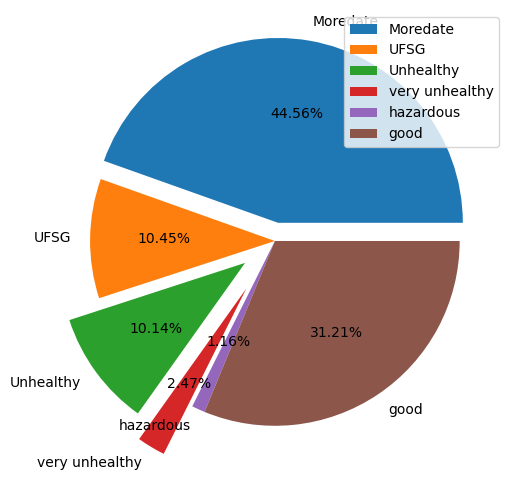

In [15]:
# importing numpy
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = ( 15, 6))

# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0)

# creating variables
one = 0
two = 0
three = 0
four = 0
five = 0
six = 0
# for loop to itreate through the output class
for i in data['AQI Category']:
    if i =="Moderate":
        one+=1
    elif i =='Unhealthy for Sensitive Groups':
        two+=1
    elif i == 'Unhealthy':
        three+=1
    elif i == 'Very Unhealthy':
        four+=1
    elif i == 'Hazardous':
        five+=1
    elif i == 'Good':
        six+=1
# creating numpy arry
labels = ['Moredate', 'UFSG', 'Unhealthy', 'very unhealthy', 'hazardous', 'good']

values = np.array([one, two, three, four, five, six])
plt.pie(values, labels = labels, autopct='%1.2f%%', explode = explode,)
plt.legend()
plt.show()

In [16]:
one = 0
two = 0
three = 0
four = 0
five = 0
six = 0
# for loop to itreate through the output class
for i in data['AQI Category']:
    if i ==0:
        one+=1
    elif i ==1:
        two+=1
    elif i == 2:
        three+=1
    elif i == 3:
        four+=1
    elif i == 4:
        five+=1
    elif i == 5:
        six+=1

In [17]:
print(one)
print(two)
print(three)
print(four)
print(five)
print(six)

0
0
0
0
0
0


In [18]:
# splitting the dataset into input and output
Input = data.drop('AQI Category', axis=1)

Output =data['AQI Category']

In [19]:
from sklearn.model_selection import train_test_split


# splitting into testing and training parts
X_train, X_test, y_train, y_test = train_test_split(Input, Output, test_size=0.30, random_state=40)

In [20]:
X_train.shape

(23322, 7)

In [21]:
# importing the CatBoot classifier
from catboost import CatBoostClassifier

# initializing the CatBoost classifier
CatBoost_clf = CatBoostClassifier()

# training the catboost classifier model
CatBoost_clf.fit(X_train, y_train)

Learning rate set to 0.092914
0:	learn: 1.3801629	total: 58.5ms	remaining: 58.4s
1:	learn: 1.1266930	total: 66.3ms	remaining: 33.1s
2:	learn: 0.9468288	total: 74.4ms	remaining: 24.7s
3:	learn: 0.8122669	total: 82.3ms	remaining: 20.5s
4:	learn: 0.7059549	total: 90.1ms	remaining: 17.9s
5:	learn: 0.6195134	total: 97.3ms	remaining: 16.1s
6:	learn: 0.5454241	total: 106ms	remaining: 15s
7:	learn: 0.4846037	total: 113ms	remaining: 14s
8:	learn: 0.4312457	total: 120ms	remaining: 13.3s
9:	learn: 0.3852354	total: 128ms	remaining: 12.7s
10:	learn: 0.3447341	total: 135ms	remaining: 12.2s
11:	learn: 0.3089415	total: 143ms	remaining: 11.8s
12:	learn: 0.2787657	total: 150ms	remaining: 11.4s
13:	learn: 0.2511359	total: 158ms	remaining: 11.2s
14:	learn: 0.2269223	total: 166ms	remaining: 10.9s
15:	learn: 0.2054311	total: 174ms	remaining: 10.7s
16:	learn: 0.1855298	total: 181ms	remaining: 10.5s
17:	learn: 0.1686904	total: 189ms	remaining: 10.3s
18:	learn: 0.1529122	total: 198ms	remaining: 10.2s
19:	learn

175:	learn: 0.0009965	total: 1.42s	remaining: 6.63s
176:	learn: 0.0009914	total: 1.42s	remaining: 6.62s
177:	learn: 0.0009879	total: 1.43s	remaining: 6.61s
178:	learn: 0.0009847	total: 1.44s	remaining: 6.6s
179:	learn: 0.0009719	total: 1.45s	remaining: 6.59s
180:	learn: 0.0009705	total: 1.46s	remaining: 6.58s
181:	learn: 0.0009662	total: 1.46s	remaining: 6.58s
182:	learn: 0.0009630	total: 1.47s	remaining: 6.57s
183:	learn: 0.0009620	total: 1.48s	remaining: 6.55s
184:	learn: 0.0009255	total: 1.49s	remaining: 6.55s
185:	learn: 0.0009222	total: 1.49s	remaining: 6.54s
186:	learn: 0.0009193	total: 1.5s	remaining: 6.53s
187:	learn: 0.0009185	total: 1.51s	remaining: 6.52s
188:	learn: 0.0009162	total: 1.52s	remaining: 6.51s
189:	learn: 0.0009145	total: 1.52s	remaining: 6.5s
190:	learn: 0.0008963	total: 1.53s	remaining: 6.49s
191:	learn: 0.0008930	total: 1.54s	remaining: 6.48s
192:	learn: 0.0008904	total: 1.55s	remaining: 6.47s
193:	learn: 0.0008882	total: 1.55s	remaining: 6.46s
194:	learn: 0.0

335:	learn: 0.0004341	total: 2.63s	remaining: 5.19s
336:	learn: 0.0004336	total: 2.64s	remaining: 5.19s
337:	learn: 0.0004330	total: 2.65s	remaining: 5.18s
338:	learn: 0.0004324	total: 2.65s	remaining: 5.18s
339:	learn: 0.0004320	total: 2.66s	remaining: 5.17s
340:	learn: 0.0004314	total: 2.67s	remaining: 5.16s
341:	learn: 0.0004268	total: 2.68s	remaining: 5.15s
342:	learn: 0.0004265	total: 2.69s	remaining: 5.14s
343:	learn: 0.0004258	total: 2.69s	remaining: 5.13s
344:	learn: 0.0004254	total: 2.7s	remaining: 5.13s
345:	learn: 0.0004248	total: 2.71s	remaining: 5.12s
346:	learn: 0.0004244	total: 2.71s	remaining: 5.11s
347:	learn: 0.0004236	total: 2.72s	remaining: 5.1s
348:	learn: 0.0004234	total: 2.73s	remaining: 5.09s
349:	learn: 0.0004229	total: 2.73s	remaining: 5.08s
350:	learn: 0.0004160	total: 2.74s	remaining: 5.07s
351:	learn: 0.0004157	total: 2.75s	remaining: 5.06s
352:	learn: 0.0004084	total: 2.76s	remaining: 5.06s
353:	learn: 0.0004076	total: 2.77s	remaining: 5.05s
354:	learn: 0.

495:	learn: 0.0002679	total: 3.84s	remaining: 3.9s
496:	learn: 0.0002677	total: 3.85s	remaining: 3.89s
497:	learn: 0.0002676	total: 3.86s	remaining: 3.89s
498:	learn: 0.0002674	total: 3.87s	remaining: 3.88s
499:	learn: 0.0002671	total: 3.87s	remaining: 3.87s
500:	learn: 0.0002667	total: 3.88s	remaining: 3.86s
501:	learn: 0.0002666	total: 3.89s	remaining: 3.86s
502:	learn: 0.0002663	total: 3.89s	remaining: 3.85s
503:	learn: 0.0002633	total: 3.9s	remaining: 3.84s
504:	learn: 0.0002619	total: 3.91s	remaining: 3.83s
505:	learn: 0.0002617	total: 3.92s	remaining: 3.82s
506:	learn: 0.0002608	total: 3.92s	remaining: 3.82s
507:	learn: 0.0002606	total: 3.93s	remaining: 3.81s
508:	learn: 0.0002603	total: 3.94s	remaining: 3.8s
509:	learn: 0.0002600	total: 3.95s	remaining: 3.79s
510:	learn: 0.0002598	total: 3.95s	remaining: 3.78s
511:	learn: 0.0002586	total: 3.96s	remaining: 3.78s
512:	learn: 0.0002565	total: 3.97s	remaining: 3.77s
513:	learn: 0.0002562	total: 3.98s	remaining: 3.76s
514:	learn: 0.0

655:	learn: 0.0001907	total: 5.05s	remaining: 2.65s
656:	learn: 0.0001905	total: 5.06s	remaining: 2.64s
657:	learn: 0.0001905	total: 5.06s	remaining: 2.63s
658:	learn: 0.0001903	total: 5.07s	remaining: 2.62s
659:	learn: 0.0001902	total: 5.08s	remaining: 2.62s
660:	learn: 0.0001895	total: 5.09s	remaining: 2.61s
661:	learn: 0.0001894	total: 5.09s	remaining: 2.6s
662:	learn: 0.0001892	total: 5.1s	remaining: 2.59s
663:	learn: 0.0001887	total: 5.11s	remaining: 2.59s
664:	learn: 0.0001886	total: 5.12s	remaining: 2.58s
665:	learn: 0.0001885	total: 5.12s	remaining: 2.57s
666:	learn: 0.0001884	total: 5.13s	remaining: 2.56s
667:	learn: 0.0001882	total: 5.14s	remaining: 2.55s
668:	learn: 0.0001881	total: 5.14s	remaining: 2.54s
669:	learn: 0.0001880	total: 5.15s	remaining: 2.54s
670:	learn: 0.0001878	total: 5.16s	remaining: 2.53s
671:	learn: 0.0001877	total: 5.17s	remaining: 2.52s
672:	learn: 0.0001877	total: 5.17s	remaining: 2.51s
673:	learn: 0.0001876	total: 5.18s	remaining: 2.51s
674:	learn: 0.

833:	learn: 0.0001509	total: 6.45s	remaining: 1.28s
834:	learn: 0.0001509	total: 6.46s	remaining: 1.27s
835:	learn: 0.0001508	total: 6.47s	remaining: 1.27s
836:	learn: 0.0001508	total: 6.47s	remaining: 1.26s
837:	learn: 0.0001507	total: 6.49s	remaining: 1.25s
838:	learn: 0.0001507	total: 6.49s	remaining: 1.25s
839:	learn: 0.0001506	total: 6.5s	remaining: 1.24s
840:	learn: 0.0001506	total: 6.51s	remaining: 1.23s
841:	learn: 0.0001505	total: 6.52s	remaining: 1.22s
842:	learn: 0.0001504	total: 6.53s	remaining: 1.22s
843:	learn: 0.0001503	total: 6.54s	remaining: 1.21s
844:	learn: 0.0001503	total: 6.55s	remaining: 1.2s
845:	learn: 0.0001502	total: 6.55s	remaining: 1.19s
846:	learn: 0.0001502	total: 6.56s	remaining: 1.19s
847:	learn: 0.0001501	total: 6.57s	remaining: 1.18s
848:	learn: 0.0001500	total: 6.58s	remaining: 1.17s
849:	learn: 0.0001500	total: 6.59s	remaining: 1.16s
850:	learn: 0.0001499	total: 6.6s	remaining: 1.16s
851:	learn: 0.0001498	total: 6.61s	remaining: 1.15s
852:	learn: 0.0

In [22]:
# making predictions
catboost_pred = CatBoost_clf.predict(X_test)

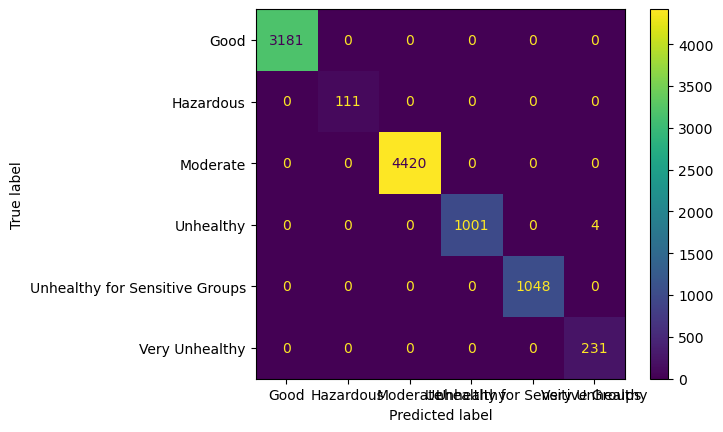

In [23]:
# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# <a href="https://techfor-today.com/sklearn-confusion-matrix-in-machine-learning/">confusion matrix</a> plotting
cm = confusion_matrix(y_test, catboost_pred, labels=CatBoost_clf.classes_)

# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CatBoost_clf.classes_)
disp.plot()
plt.show()

In [24]:
# importing the module
from sklearn.metrics import accuracy_score

# printing
print("The accuracy is: ", accuracy_score(y_test, catboost_pred))

The accuracy is:  0.9995998399359743


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, catboost_pred))


                                precision    recall  f1-score   support

                          Good       1.00      1.00      1.00      3181
                     Hazardous       1.00      1.00      1.00       111
                      Moderate       1.00      1.00      1.00      4420
                     Unhealthy       1.00      1.00      1.00      1005
Unhealthy for Sensitive Groups       1.00      1.00      1.00      1048
                Very Unhealthy       0.98      1.00      0.99       231

                      accuracy                           1.00      9996
                     macro avg       1.00      1.00      1.00      9996
                  weighted avg       1.00      1.00      1.00      9996



In [26]:
catboost_pred_train = CatBoost_clf.predict(X_train)

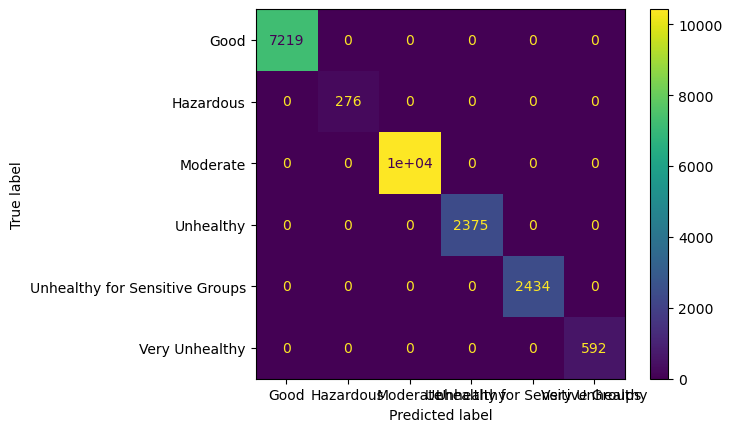

In [27]:
cm = confusion_matrix(y_train, catboost_pred_train, labels=CatBoost_clf.classes_)

# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CatBoost_clf.classes_)
disp.plot()
plt.show()

In [28]:
# printing
print("The accuracy is: ", accuracy_score(y_train, catboost_pred_train))

The accuracy is:  1.0


In [29]:
print(classification_report(y_train, catboost_pred_train))

                                precision    recall  f1-score   support

                          Good       1.00      1.00      1.00      7219
                     Hazardous       1.00      1.00      1.00       276
                      Moderate       1.00      1.00      1.00     10426
                     Unhealthy       1.00      1.00      1.00      2375
Unhealthy for Sensitive Groups       1.00      1.00      1.00      2434
                Very Unhealthy       1.00      1.00      1.00       592

                      accuracy                           1.00     23322
                     macro avg       1.00      1.00      1.00     23322
                  weighted avg       1.00      1.00      1.00     23322



In [30]:
import pickle
pickle.dump(CatBoost_clf, open('CatBoost', 'wb'))

In [30]:
# importing the lightgbm module
import lightgbm as lgb

# initializing the model
model_Clf = lgb.LGBMClassifier()

# training the model
model_Clf.fit(X_train, y_train)

LGBMClassifier()

In [31]:
# making prediction 
clf_pred = model_Clf.predict(X_test)
clf_pred_train= model_Clf.predict(X_train)

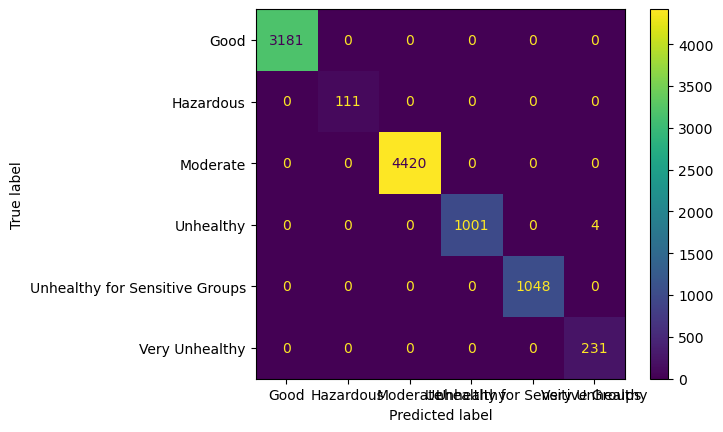

In [32]:
# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion matrix plotting
cm = confusion_matrix(y_test, clf_pred, labels=model_Clf.classes_)

# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_Clf.classes_)
disp.plot()
plt.show()

In [33]:
# importing the module
from sklearn.metrics import accuracy_score

# printing
print("The accuracy is: ", accuracy_score(y_test, clf_pred))

The accuracy is:  0.9995998399359743


In [34]:
print(classification_report(y_test, clf_pred))

                                precision    recall  f1-score   support

                          Good       1.00      1.00      1.00      3181
                     Hazardous       1.00      1.00      1.00       111
                      Moderate       1.00      1.00      1.00      4420
                     Unhealthy       1.00      1.00      1.00      1005
Unhealthy for Sensitive Groups       1.00      1.00      1.00      1048
                Very Unhealthy       0.98      1.00      0.99       231

                      accuracy                           1.00      9996
                     macro avg       1.00      1.00      1.00      9996
                  weighted avg       1.00      1.00      1.00      9996



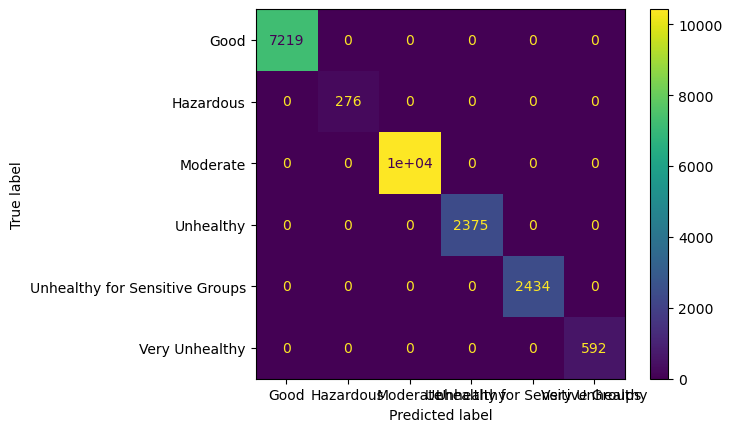

In [35]:
cm = confusion_matrix(y_train, clf_pred_train, labels=CatBoost_clf.classes_)

# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CatBoost_clf.classes_)
disp.plot()
plt.show()

In [36]:
print("The accuracy is: ", accuracy_score(y_train, clf_pred_train))
print(classification_report(y_train, clf_pred_train))

The accuracy is:  1.0
                                precision    recall  f1-score   support

                          Good       1.00      1.00      1.00      7219
                     Hazardous       1.00      1.00      1.00       276
                      Moderate       1.00      1.00      1.00     10426
                     Unhealthy       1.00      1.00      1.00      2375
Unhealthy for Sensitive Groups       1.00      1.00      1.00      2434
                Very Unhealthy       1.00      1.00      1.00       592

                      accuracy                           1.00     23322
                     macro avg       1.00      1.00      1.00     23322
                  weighted avg       1.00      1.00      1.00     23322



In [37]:
import pickle
pickle.dump(model_Clf, open('LightGBM', 'wb'))

In [42]:
# importing sklearn knn classifier
from sklearn.neighbors import KNeighborsClassifier

# K value set to be 3
classifer = KNeighborsClassifier(n_neighbors=5 )

In [43]:
# model training
classifer.fit(X_train,y_train)

KNeighborsClassifier()

In [44]:
# making predictions
y_pred = classifer.predict(X_test)
y_pred_train = classifer.predict(X_train)

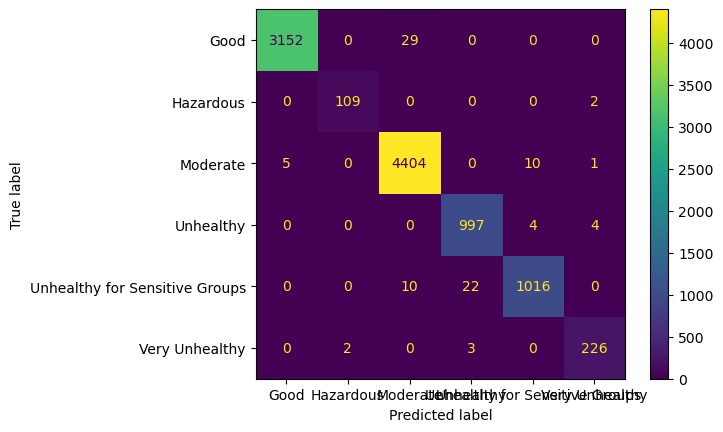

In [45]:
# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion matrix plotting
cm = confusion_matrix(y_test, y_pred, labels=classifer.classes_)

# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifer.classes_)
disp.plot()
plt.show()

In [46]:
# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy 
accuracy_score(y_test,y_pred) 

0.990796318527411

In [41]:
print(classification_report(y_test, y_pred))

                                precision    recall  f1-score   support

                          Good       1.00      0.99      0.99      3181
                     Hazardous       0.98      0.98      0.98       111
                      Moderate       0.99      1.00      0.99      4420
                     Unhealthy       0.98      0.99      0.98      1005
Unhealthy for Sensitive Groups       0.99      0.97      0.98      1048
                Very Unhealthy       0.97      0.98      0.97       231

                      accuracy                           0.99      9996
                     macro avg       0.98      0.98      0.98      9996
                  weighted avg       0.99      0.99      0.99      9996



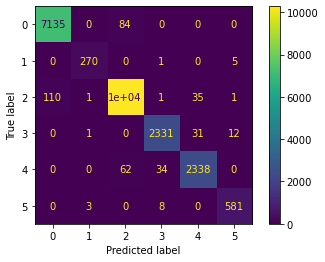

In [47]:
cm = confusion_matrix(y_train, y_pred_train, labels=classifer.classes_)

# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CatBoost_clf.classes_)
disp.plot()
plt.show()

In [48]:
print("The accuracy is: ", accuracy_score(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

The accuracy is:  0.9833204699425435
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7219
           1       0.98      0.98      0.98       276
           2       0.99      0.99      0.99     10426
           3       0.98      0.98      0.98      2375
           4       0.97      0.96      0.97      2434
           5       0.97      0.98      0.98       592

    accuracy                           0.98     23322
   macro avg       0.98      0.98      0.98     23322
weighted avg       0.98      0.98      0.98     23322



In [47]:
import pickle
pickle.dump(classifer, open('KNN', 'wb'))

In [59]:
!pip install numpy==1.22

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 1.3 MB/s eta 0:00:00m eta 0:00:010:00:01m
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6


In [60]:
data.head()

,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.
1,2019,2,6,7,17.0,61,Moderate,20.0
2,2019,2,6,8,19.1,66,Moderate,21.0
3,2019,2,6,9,22.4,73,Moderate,25.0
4,2019,2,6,10,30.9,91,Moderate,39.0
5,2019,2,6,11,35.0,99,Moderate,39.0


In [61]:
# importing required module for Neural Networks for Classification using TensorFlow
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer
from tensorflow.keras import Sequential

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [54]:
# defineNeural Networks for Classification using TensorFlow model
model = Sequential()
# adding input layer with 16 nodes
model.add(InputLayer(6))
# adding hidden layer with 10 nodes
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))

NameError: name 'Sequential' is not defined

In [197]:
# adding output layer 
model.add(Dense(6, activation='softmax'))

In [198]:
# compile the Neural Networks for Classification using TensorFlow model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
729/729 [==============================] - 2s 2ms/step - loss: 526.0876 - accuracy: 0.3186
Epoch 2/50
729/729 [==============================] - 1s 2ms/step - loss: 3.6266 - accuracy: 0.7104
Epoch 3/50
729/729 [==============================] - 1s 2ms/step - loss: 2.0820 - accuracy: 0.8239
Epoch 4/50
729/729 [==============================] - 1s 2ms/step - loss: 1.6742 - accuracy: 0.8436
Epoch 5/50
729/729 [==============================] - 2s 2ms/step - loss: 1.3785 - accuracy: 0.8564
Epoch 6/50
729/729 [==============================] - 1s 2ms/step - loss: 1.0989 - accuracy: 0.8706
Epoch 7/50
729/729 [==============================] - 2s 2ms/step - loss: 0.9099 - accuracy: 0.8695
Epoch 8/50
729/729 [==============================] - 1s 2ms/step - loss: 0.7967 - accuracy: 0.8671
Epoch 9/50
729/729 [==============================] - 1s 2ms/step - loss: 0.6601 - accuracy: 0.8721
Epoch 10/50
729/729 [==============================] - 1s 2ms/step - loss: 0.5918 - accuracy: 0.88

In [199]:
# evaluate Neural Networks for Classification using TensorFlow
evaluate = model.evaluate(X_test, y_test)
print('Test Accuracy:', evaluate[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0866 - accuracy: 0.9688
Test Accuracy: 0.9687874913215637


In [ ]:
print(classification_report(y_test, y_pred))